<a href="https://colab.research.google.com/github/NaraGuimma/NY_Airbnb_DataAnalytics/blob/master/restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics - Challenge**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [3]:
# Displaying the 10 first rows of the dataset
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
# which days the restaurant is open
tips_df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [5]:
#   Number of days per week that the restaurant is open
len(tips_df['day'].unique())

4

In [6]:
# What day of the week is there more bills?
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

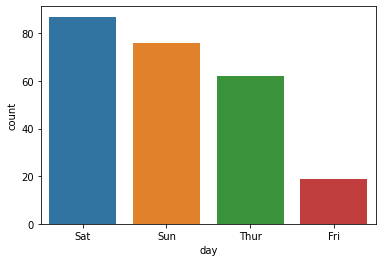

In [7]:
# Using Seaborn Countplot
order = tips_df['day'].value_counts().index
sns.countplot(data=tips_df, x='day', order=order)

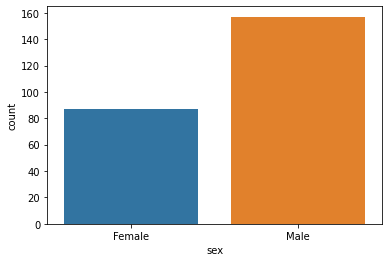

In [8]:
sns.countplot(data=tips_df, x = 'sex')

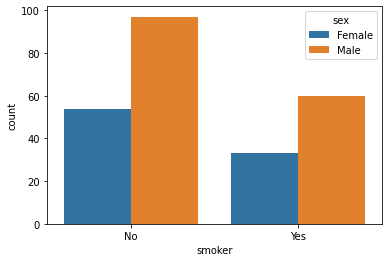

In [9]:
sns.countplot(data=tips_df, x='smoker', hue='sex')

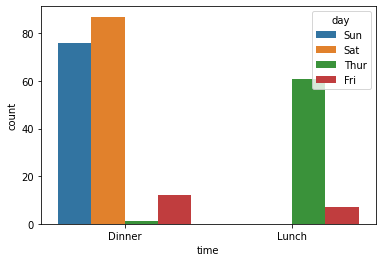

In [10]:
sns.countplot(data=tips_df, x='time', hue='day')

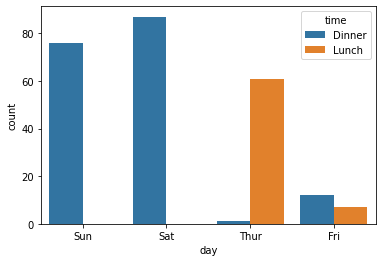

In [11]:
sns.countplot(data=tips_df, x='day', hue='time')

In [12]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

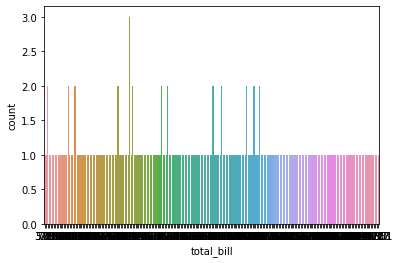

In [13]:
sns.countplot(data=tips_df, x='total_bill')

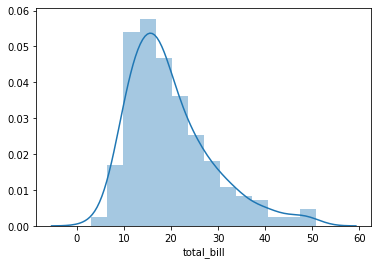

In [14]:
sns.distplot(tips_df["total_bill"])

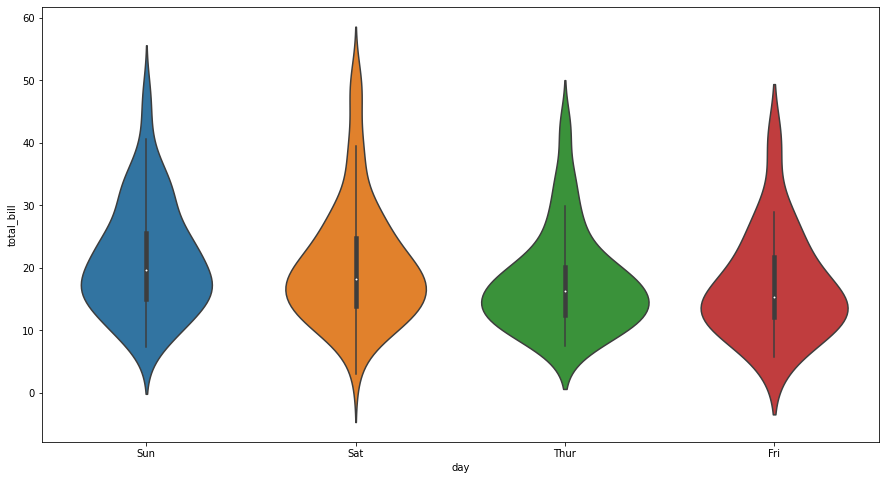

In [18]:
plt.figure(figsize = (15,8))
sns.violinplot(data = tips_df, x = "day", y = "total_bill")

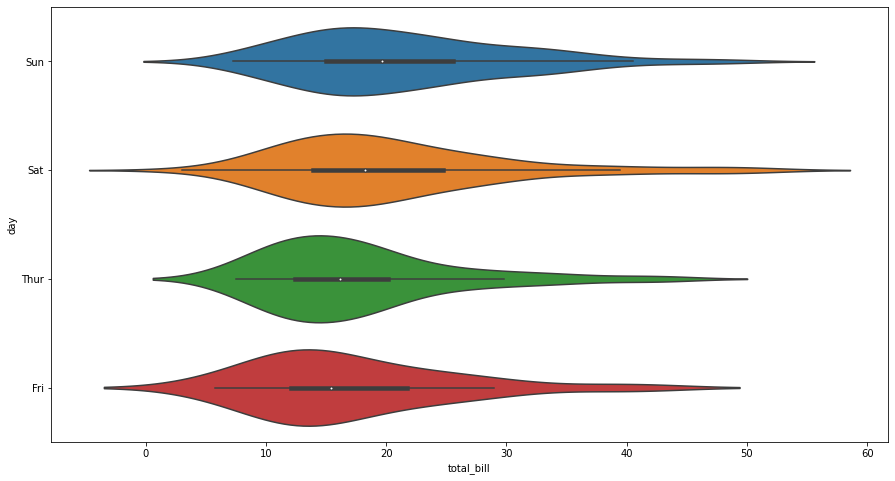

In [19]:
plt.figure(figsize = (15,8))
sns.violinplot(data = tips_df, y = "day", x = "total_bill")

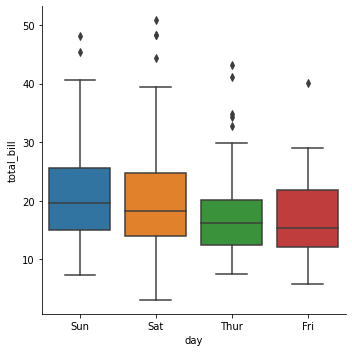

In [20]:
# plotting the distribution of `total_bill` based on a given category. Starting with `day`
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")

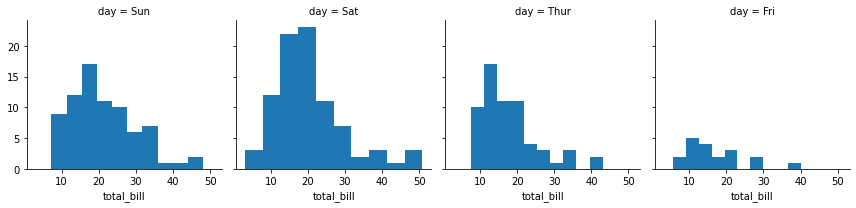

In [21]:
# Let's use [`seaborn.FacetGrid`]
g = sns.FacetGrid(tips_df, col="day")
g.map(plt.hist, "total_bill")

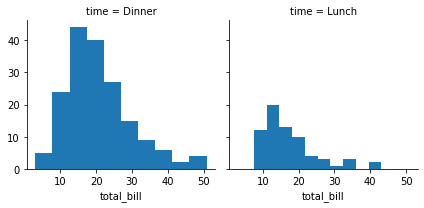

In [22]:
g = sns.FacetGrid(tips_df, col="time")
g.map(plt.hist, "total_bill")

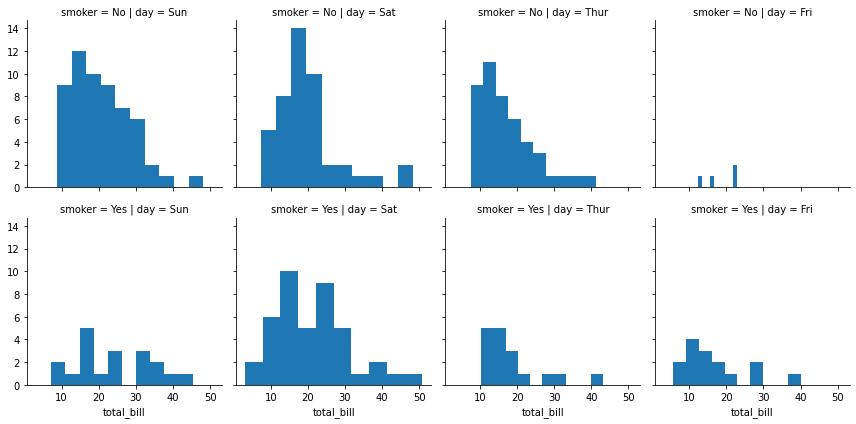

In [23]:
# add a `row="smoker"` parameter
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")

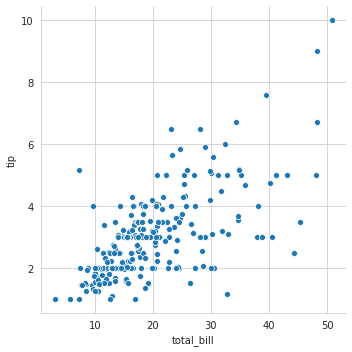

In [24]:
#Correlation

#Looking for correlation between columns in the dataset.
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)

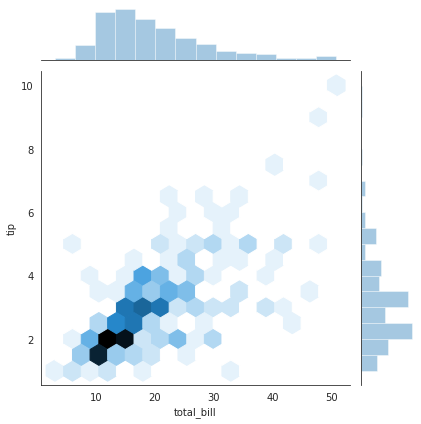

In [25]:
# using [`seaborn.jointplot`]
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips_df)

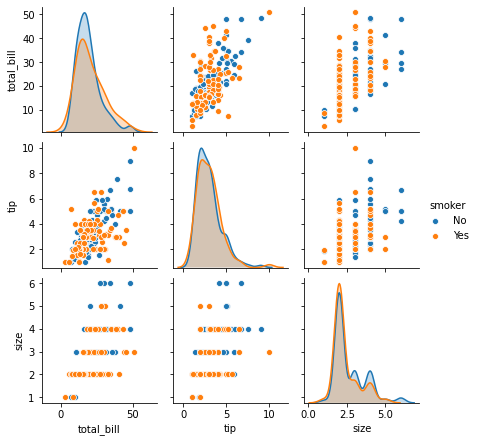

In [26]:
# A very useful tool to **identify** correlations: [`seaborn.pairplot`]
sns.pairplot(tips_df, height=2, hue="smoker")

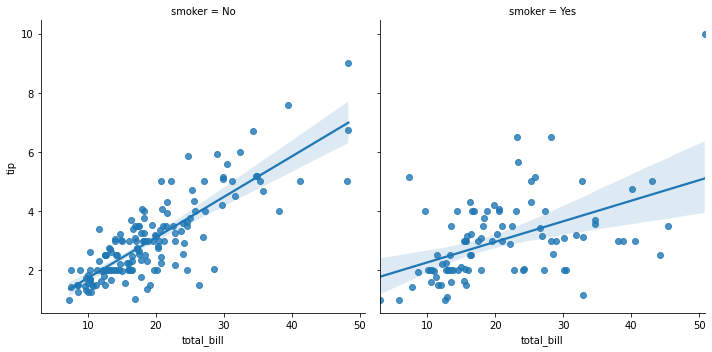

In [27]:
# Regression

# Using [`seaborn.lmplot`]
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips_df)